# Playing with Travel
* In this notebook we explore Driving as a mode of transport against other forms of transport. 
* We begin by converting the travel data into propotions of the overall travel for each Local Authority (LA). 
* We then consider only the LAs where driving makes up less than 50% of the travel. 
___
___
## First let's convert the travel data to proportions 
* The sum of each row should be 1. 
* See the new column Row_Sum which confirms this to be the case.  

In [1]:
%matplotlib inline
from lds.data import Data
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

df = Data["Travel_2011"].set_index(["LA","Region"])
#rewrite the travel methods as propotions of the total
df = df.loc[:,"Home":"Other"].apply(lambda x: x / x.sum() , axis = 1)
df["Row_Sum"] = df.sum(axis=1)
df

,,Home,Underground,Train,Bus,Taxi,Motorcycle,Drive,Passenger,Bike,Walk,Other,Row_Sum
LA,Region,,,,,,,,,,,,
County Durham,North East,0.090621,0.001417,0.008184,0.060256,0.006148,0.004555,0.643475,0.076185,0.009676,0.094298,0.005187,1.0
Darlington,North East,0.085282,0.000673,0.016893,0.068960,0.008222,0.003897,0.591280,0.068083,0.023483,0.128208,0.005019,1.0
Gateshead,North East,0.069473,0.046475,0.007673,0.151387,0.004931,0.003962,0.546774,0.063454,0.014302,0.086703,0.004865,1.0
Hartlepool,North East,0.065480,0.000874,0.012418,0.067678,0.017820,0.004634,0.605370,0.083591,0.018694,0.113988,0.009453,1.0
Middlesbrough,North East,0.061177,0.000807,0.012796,0.089244,0.016536,0.003575,0.571159,0.085046,0.025208,0.124095,0.010358,1.0
Newcastle upon Tyne,North East,0.070641,0.052826,0.011572,0.182076,0.008690,0.002891,0.453890,0.056195,0.027008,0.128227,0.005983,1.0
North Tyneside,North East,0.072866,0.088757,0.014423,0.089622,0.007790,0.004905,0.547175,0.061973,0.024420,0.078718,0.009352,1.0
Northumberland,North East,0.121810,0.004486,0.012607,0.051688,0.003560,0.004643,0.616510,0.063192,0.014118,0.099604,0.007781,1.0
Redcar and Cleveland,North East,0.071583,0.000763,0.020850,0.058807,0.006885,0.004525,0.643805,0.070554,0.015527,0.094669,0.012031,1.0


## Only consider LAs where Driving is less than 50%
### Notice that we now only have 52 LAs

In [2]:
# Look at just the data where Driving makes up less than 50% of travel
df_50 = df.query('Drive<0.5')
len(df_50)

52

___
___
# Scatter Diagrams
* Here we produce 9 scatter diagrams. We include all modes other than "Other"
* The code below looks intimidating but don't worry about the code. 
* Think about what the Scatter Diagrams tell us. 
* What questions do you have about the data?

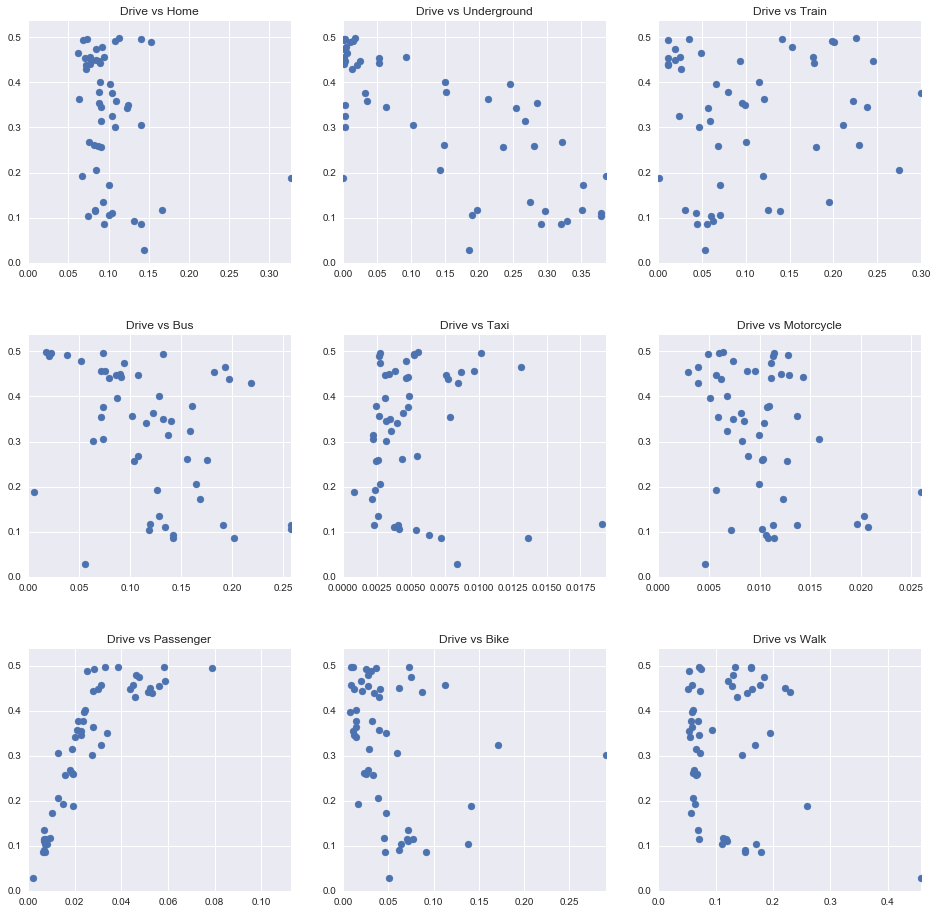

In [3]:
plt.figure(1,figsize = (16,16))
non_drive_modes = [mode for mode in df.axes[1] if mode not in ["Drive","Other","Row_Sum"]]
for i,mode in enumerate(non_drive_modes):
    plt.subplot(3,3,i+1)
    plt.scatter(df_50[mode],df_50["Drive"])
    plt.title('Drive vs ' + mode)
    plt.xlim(xmin=0,xmax=max(df[mode]))
    plt.ylim(ymin=0)
    
plt.subplots_adjust(hspace=0.3)

# Extreme LAs
* In this code we find the LAs in the scatter diagram that have the highest proportion of each transport mode other than Driving. 
* Can you identify the LA in each Scatter Diagram?
* Does each LA make sense for the category?

In [4]:
data = {"Mode": non_drive_modes,
        "Location":[df[mode].idxmax() for mode in non_drive_modes], 
        "Values":[df[mode][df[mode].idxmax()] for mode in non_drive_modes]}

pd.DataFrame(data).set_index("Mode")

,Location,Values
Mode,,
Home,"(Isles of Scilly, South West)",0.326468
Underground,"(Newham, London)",0.385923
Train,"(Bromley, London)",0.300050
Bus,"(Hackney, London)",0.257608
Taxi,"(Knowsley, North West)",0.019371
Motorcycle,"(Isles of Scilly, South West)",0.025934
Passenger,"(Boston, East Midlands)",0.112669
Bike,"(Cambridge, East of England)",0.290341
Walk,"(City of London, London)",0.457973


___
# London
## How many of the LAs from the scatter diagrams are based in London?

In [5]:
len(df_50.query('Region == "London"'))

32

## What about from the original data?

In [6]:
len(df.query('Region == "London"'))

33

## Which one is missing?

In [7]:
df.query('Region == "London"').sort_values(by = "Drive", ascending = False).head(n = 1)

,,Home,Underground,Train,Bus,Taxi,Motorcycle,Drive,Passenger,Bike,Walk,Other,Row_Sum
LA,Region,,,,,,,,,,,,
Hillingdon,London,0.086185,0.129826,0.041745,0.1173,0.003239,0.007944,0.501566,0.030309,0.014521,0.063704,0.003661,1.0


# Scatter diagrams highlighting London

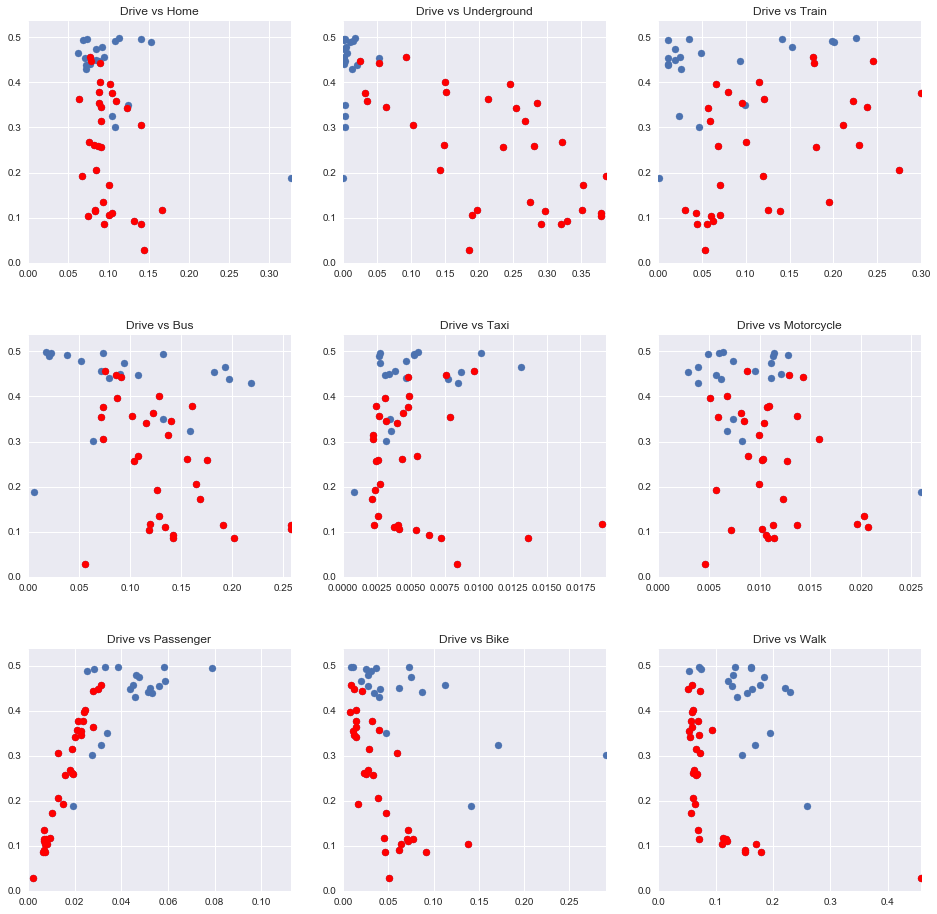

In [8]:
plt.figure(1,figsize = (16,16))
df_london = df_50.query('Region == "London"')
non_drive_modes = [mode for mode in df.axes[1] if mode not in ["Drive","Other","Row_Sum"]]
for i,mode in enumerate(non_drive_modes):
    plt.subplot(3,3,i+1)
    plt.scatter(df_50[mode],df_50["Drive"])
    plt.scatter(df_london[mode],df_london["Drive"], c = "r")
    plt.title('Drive vs ' + mode)
    plt.xlim(xmin=0,xmax=max(df[mode]))
    plt.ylim(ymin=0)
    
plt.subplots_adjust(hspace=0.3)